<a href="https://colab.research.google.com/github/hhnnhh/berlin_datascience_lab/blob/master/exploration/01_EDA/EDA_important_car_features_biased_stations_software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis:
by Hannah Bohle

Explored features are: 
- engine size, engine size orig
- model
- station num, analyzer num
- cyl, trans type, dual exhaust
- software version

Summary of my suggestions following the EDA:
I'd suggest to use ENGINE_SIZE; CYL and eventually TRANS_TYPE.

*Open task:* 
* calculate the ratio of pass/fail for each station, as there seems an odd 
station with 50% fail?!
* Same problem with Software_Version, even if the bias is not that obvious

1. use **ENGINE_SIZE** but *not* **ENGINE_SIZE_ORIG**
2. use **MAKE** but *not* **MODEL** ('MODEL' needs to be cleaned, but 'MAKE' will eventually contain similar information. Consider using MODEL if MAKE is very good)
3. **STATION_NUM**: not an interesting variable for our algorithm, because it wont explain the emissions. However, I didn't manage to calculate the percentage of PASS/FAIL per station, which would be interesting to report to the client, there seems to be one biased station with 50% fails?!
4. I'd suggest to use **CYL** after getting rid of the letter 'R'. Can and should be converted to float? 
5. **TRANS_TYPE** (automatic/manual) - I read an article that automatic cars can have lower emissions (but only certain automatic cars) --> take or leave?
6. **DUAL_EXHAUST** (yes/no), binary variables.  DE is very imbalanced with only 0.6% YES. Not so interesting I guess.
7. **Software Version**: there are SV that seem to have more PASSES than FAILS? If this is really a bias, then I guess we should report it to the client. *--> LOOK INTO IT.*

I *have not* looked into Abort_Codes, Abort_Code_Description (because I think Isabelle has already done it) and ANALYZER_NUM

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading data frame

In [4]:
#data path:
data_path = "/content/drive/My Drive/WIMLDS/sample.csv"
#data load
df = pd.read_csv(data_path, lineterminator='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,18,26,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Preparing the data for exploration



    engine size, engine size orig
    model
    station num, analyzer num
    cyl, trans type, dual exhaust
    software version
    abort codes, abort code description


In [5]:
keep_cols = ['VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_SDATE', 'TEST_EDATE', 'VIN', 'VIN_SOURCE', 'VEH_LICENSE', 'GVW_TYPE', 'GVWR', 'MODEL_YEAR', 
             'MAKE', 'MODEL', 'CYL', 'ENGINE_SIZE', 'TRANS_TYPE', 'DUAL_EXHAUST', 'ODOMETER', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION', 'ESC', 'VRT_RECORD_ID', 
             'ABORT_CODE', 'SOFTWARE_VERSION', 'INSP_COMMENTS', 'OVERALL_RESULT', 'ABORT_CODE_OTHER_DESC', 'MECHANIC_LAST_NAME', 'MECHANIC_FIRST_NAME', 'MECHANIC_MIDDLE_INIT', 
             'ENGINE_SIZE_ORIG', 'VID_TEST_TYPE']

df = df[keep_cols]

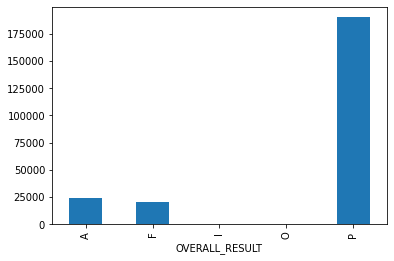

In [6]:
df.groupby('OVERALL_RESULT').size().plot.bar()

In [7]:
#reducing df by overall-result = P,F
df = df[df.OVERALL_RESULT.isin(['P', 'F'])]

In [8]:
df.head()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
0,4486883.0,IS329,W036,26351553,2004-12-16 10:57:00,2004-12-16 11:03:00,1FTCR10A8RUE42421,S,NPE42421,1.0,4222,1994,FORD,RANGER REG. CAB - SHO,4,2300,M,N,53274,G,3,87107,F,11.0,948055,NaN,141.0,NaN,P,NaN,SANCHEZ,TIM,J,NaN,I
1,4437994.0,IS267,W014,17496701,2004-08-13 14:10:00,2004-08-13 14:12:00,1G1JC5249Y7453635,S,CKK700,1.0,2875,2000,CHEVROLET,CAVALIER,4,2200,A,N,109225,G,1,87114,F,6.0,0,NaN,140.0,NaN,P,NaN,Trujillo,Vince,NaN,NaN,I
3,4469421.0,IS359,W042,11117229,2004-12-02 11:33:00,2004-12-02 11:39:00,1JCNJ15U6FT075960,M,469FNH,2.0,6200,1985,JEEP,GRAND WAGONEER,8,5900,A,N,152121,G,4,87103,F,15.0,850119,NaN,141.0,NaN,P,NaN,NGUYEN,DUC,NaN,NaN,I
4,4492858.0,IS171,W052,22095231,2004-12-29 17:00:00,2004-12-29 17:03:00,1G8ZJ5273VZ102496,S,NP102496,1.0,2625,1997,SATURN,SC,4,1900,M,N,135640,G,1,87111,R,6.0,0,NaN,147.0,NaN,P,NaN,Nguyen,Kenny,T,NaN,I
5,4427054.0,IS139,W102,23867222,2004-07-23 11:10:00,2004-07-23 11:12:00,1FAFP40491F121873,S,FAX071,1.0,3375,2001,FORD,MUSTANG,6,3800,A,N,43428,G,1,87109,F,6.0,0,NaN,140.0,NaN,P,NaN,FRIEND,RICHARD,NaN,NaN,I


##1. (A) ENGINE SIZE and (B) ENGINE SIZE ORIG

My suggestion: use ENGINE_SIZE but *not* ENGINE_SIZE_ORIG!

1. what do they encode?
*   (A) Engine size: Engine Size in cubic centimeters, cubic inches or liters , 4 char
*   (B) Engine size orig: Engine Size Other manually entered by tech., 10 Char.

--> (A) is continous, while (B) is a string (eg. 3.5L, 4.0L, ..)

2. are they related?
 --> haven't found a relation or pattern, but it is difficult to determine because (B) has loads of different strings

3. are they correlated with the overall results?
--> the boxplot does not show an obvious difference
--> Failing cars seem to have a slightly smaller engine size but it might be confounded with age, as older cars will have smaller engines and will fail more often

*Open task:* We could convert (B) to float by getting rid of the letters ('L') but also some other letters ('I') - but we would have to look closer into the variable, I doubt that it's worth it.



## (A) ENGINE SIZE

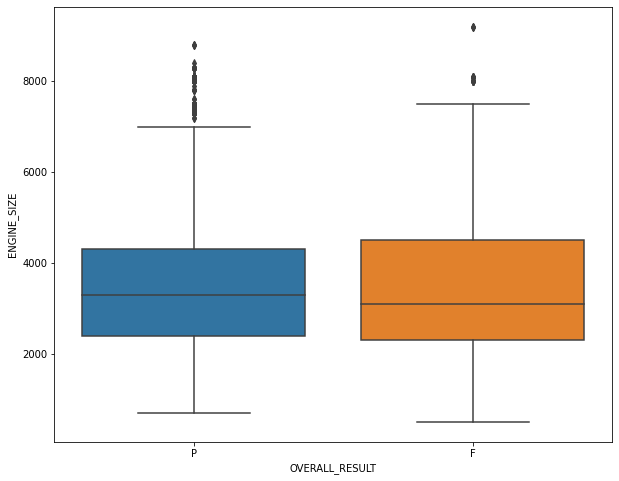

In [9]:
#ENGINE SIZE DOES NOT SEEM TO HAVE AN IMPACT ON RESULT
# Failing cars seem to have a slightly smaller engine size but it might be confounded with age, as older cars will have smaller engines and fail more often
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='OVERALL_RESULT', y='ENGINE_SIZE')

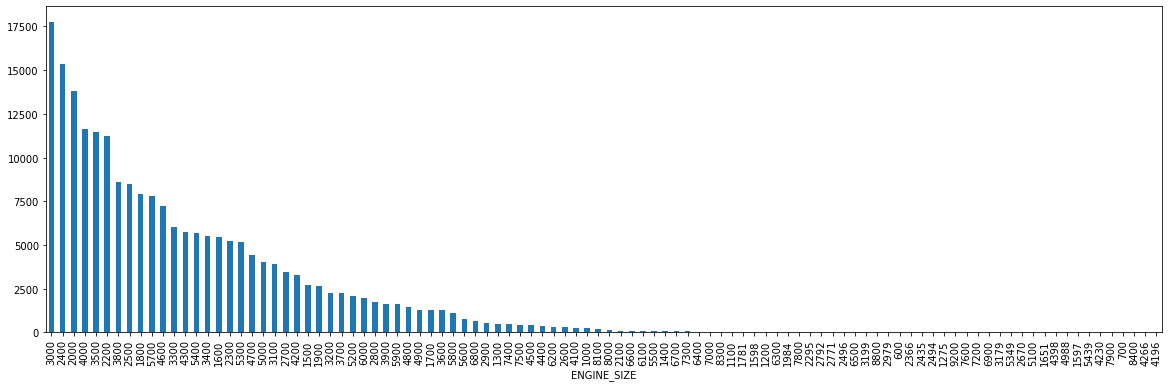

In [10]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('ENGINE_SIZE').size().sort_values(ascending=False).head(100).plot.bar()

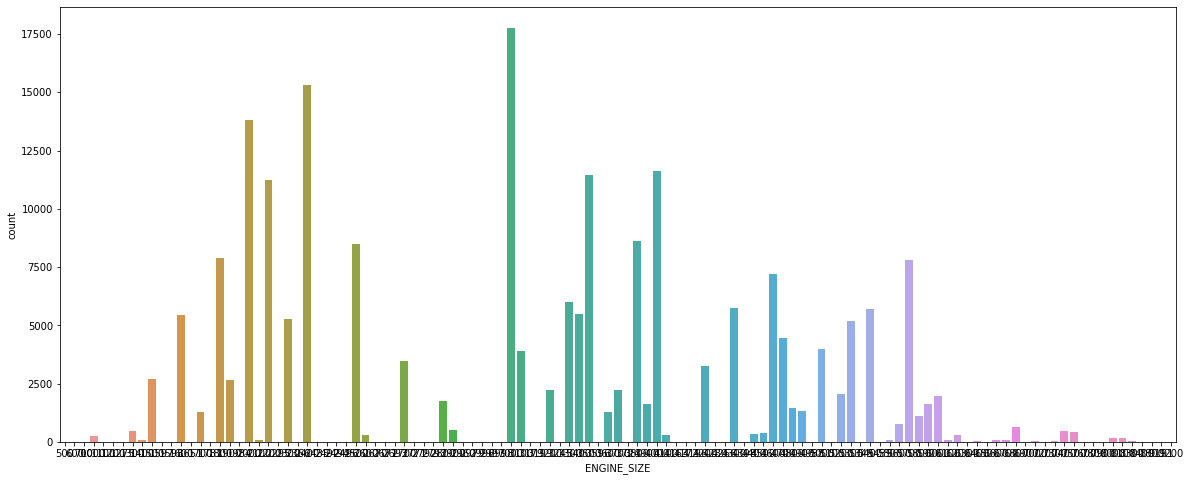

In [11]:
fig, ax = plt.subplots(figsize=[20,8])
sns.countplot(df['ENGINE_SIZE'])
#sns.countplot((df['ENGINE_SIZE']>2000) & (df['ENGINE_SIZE']<4000))

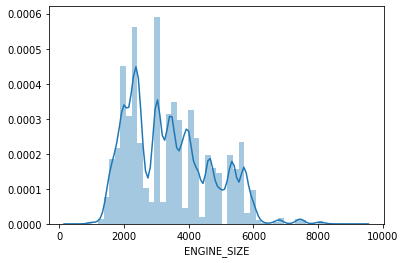

In [12]:
sns.distplot(df["ENGINE_SIZE"])

##(B) ENGINE SIZE ORIG

In [13]:
#Engine size is a numerical and continous variable
#Engine size Orig = object --> several letter characters such as L
df.ENGINE_SIZE_ORIG.describe()

count     43073
unique      213
top        3.5L
freq       4418
Name: ENGINE_SIZE_ORIG, dtype: object

In [14]:
df.ENGINE_SIZE_ORIG.value_counts()

3.5L     4418
4.0L     2559
2.4L     2515
2.0L     2467
3.0L     2268
         ... 
164I        1
2435C       1
128I        1
8.4L        1
1597C       1
Name: ENGINE_SIZE_ORIG, Length: 213, dtype: int64

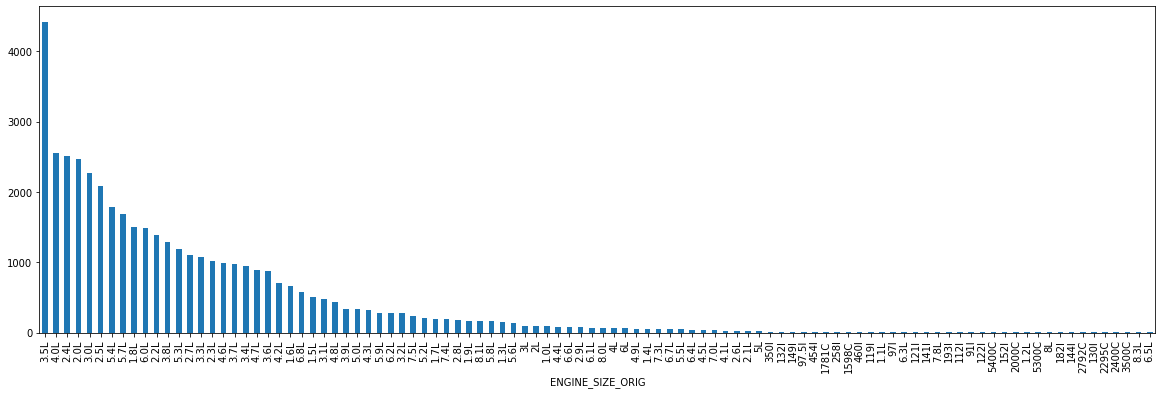

In [15]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('ENGINE_SIZE_ORIG').size().sort_values(ascending=False).head(100).plot.bar()

#MODEL

My preliminary suggestion: use the variable MAKE before using MODEl. MAKE is cleaner, is less work and might contain similar information. **If MAKE is improving a lot, then we might think about cleaning MODEL and use it as well.**

We could think about:
1. using fuzzywuzzy to compare strings for similarity
2. use a clustering algorithm to group the models?
3. strip either all numbers or at least 4WD, 2WD and AWD to reduce number of cars
4. unique cars - do we need them? are they caused by mistakes?


In [16]:
df.MODEL.describe()

count     210669
unique      2657
top        CAMRY
freq        4930
Name: MODEL, dtype: object

In [17]:
df.MODEL.unique()

array(['RANGER REG. CAB - SHO', 'CAVALIER', 'GRAND WAGONEER', ...,
       'C30T5', 'FIT3', '500L'], dtype=object)

In [18]:
df.MODEL.value_counts()

CAMRY            4930
CIVIC            4028
COROLLA          3321
TAURUS           3014
C1500            2887
                 ... 
E350HEAVYDUTY       1
EOSKOMFORT          1
PWRRM150            1
TRIBEKA             1
Z4MCOUPE            1
Name: MODEL, Length: 2657, dtype: int64

In [19]:
len(df.MODEL.unique()) # es gibt nur 2740 unique models von 235177?

2658

In [20]:
len(df.MODEL)

210675

In [21]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

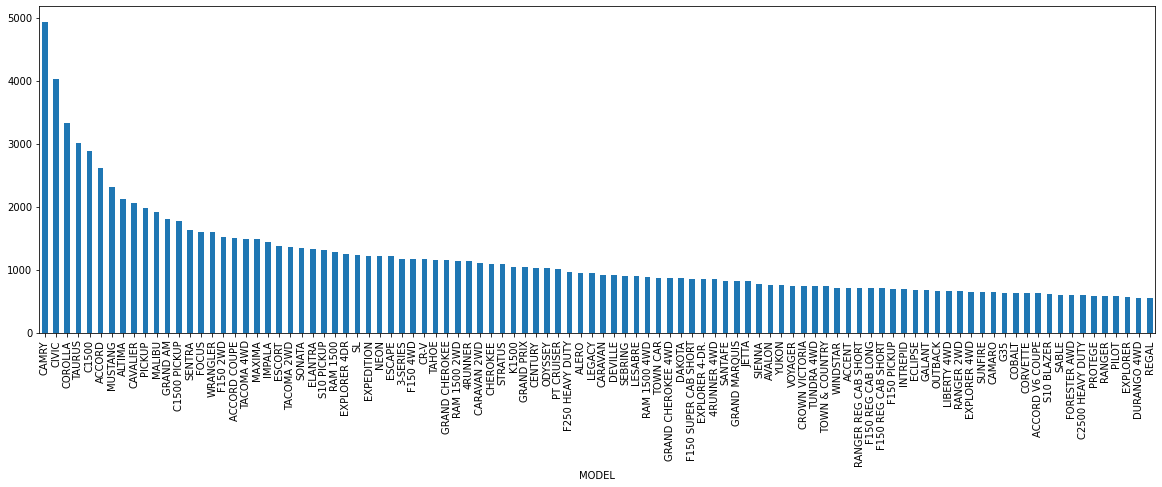

In [22]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('MODEL').size().sort_values(ascending=False).head(100).plot.bar()

In [23]:
md = df.groupby('MODEL')#.size().sort_values(ascending=False).head(100)
size = md.size()
size[size > 100].index

Index(['240', '240SX', '3-SERIES', '3.2TL', '300', '300 M', '300ZX', '350Z',
       '4RUNNER', '4RUNNER 2WD',
       ...
       'X5', 'XB', 'XC90', 'XG350', 'XTERRA', 'XTERRA 2WD', 'XTERRA 4WD',
       'YARIS', 'YUKON', 'YUKON AWD'],
      dtype='object', name='MODEL', length=396)

In [24]:
frequent_models = df[df.MODEL.isin(size[size >= 500].index)]

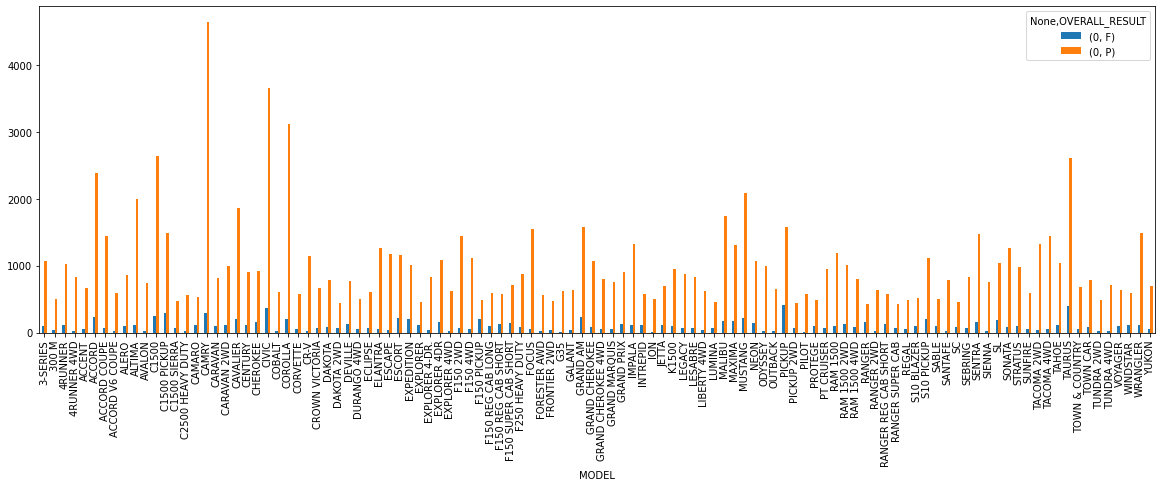

In [25]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_models.groupby(['MODEL', 'OVERALL_RESULT']).size()).unstack().plot.bar(ax=ax)
#pd.DataFrame(df.groupby(['MODEL', 'OVERALL_RESULT']).size().sort_values(ascending=False).head(100)

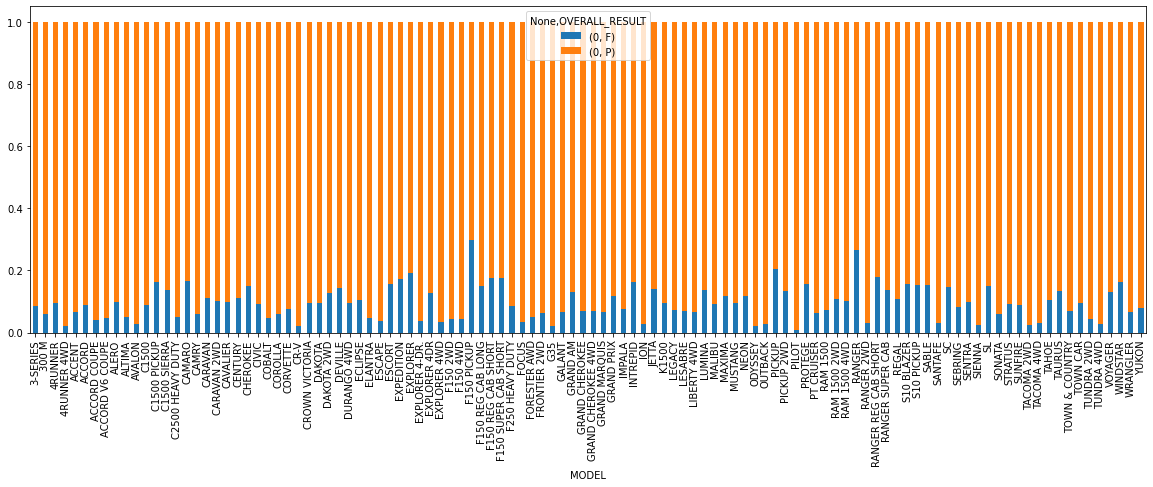

In [26]:
# some of the cars DO seem to have a higher FAIL ratio (--> F150 Pickup, Ranger), but there are other Pickups that don't
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_models.groupby(['MODEL', 'OVERALL_RESULT']).size()/frequent_models.groupby('MODEL').size()).unstack().plot.bar(ax=ax, stacked=True)

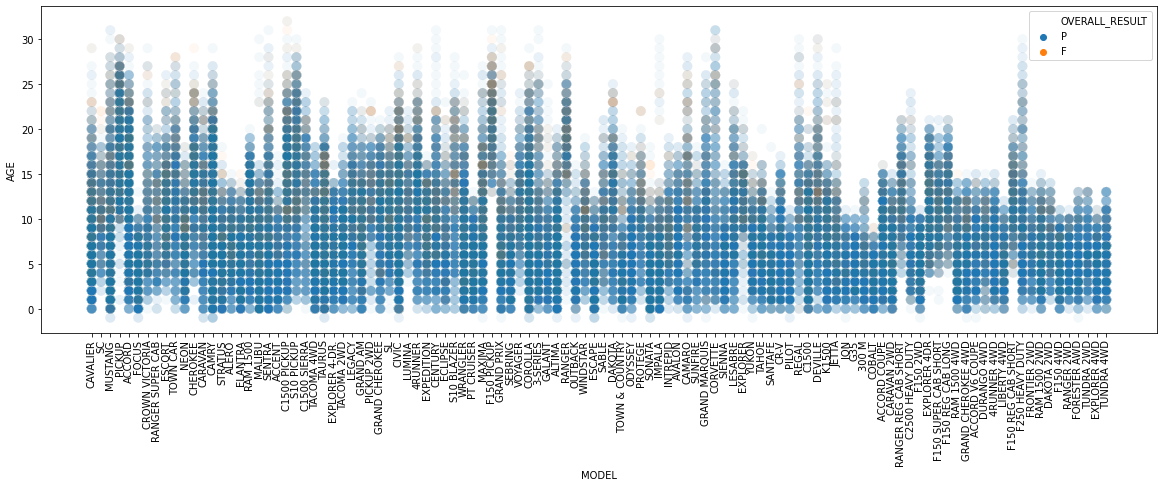

In [27]:
#as expected, older cars seem to fail more often. There is no obvious relation between MODEL and RESULT.
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_models, x='MODEL', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.05)

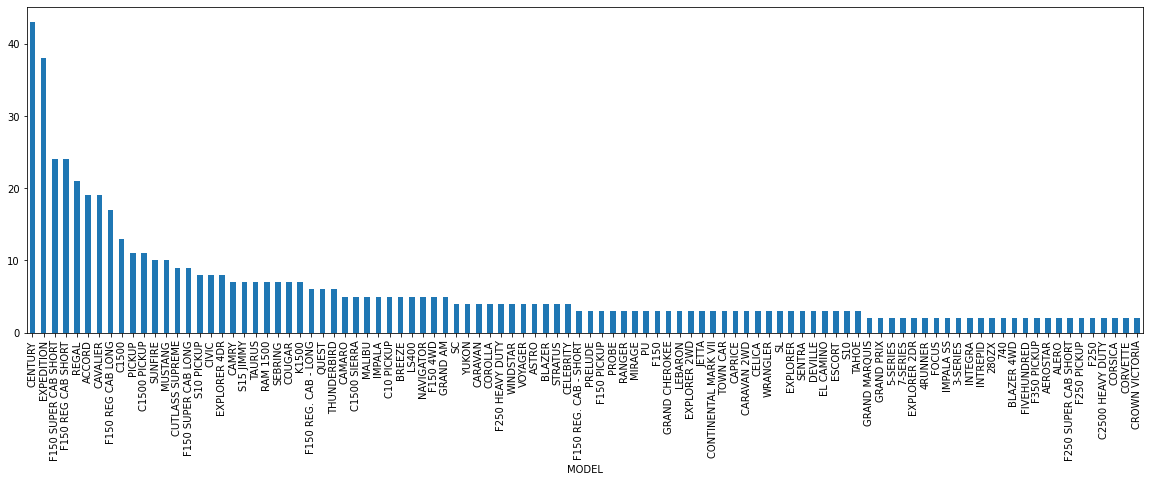

In [28]:
#some of the models have more wrong odometer values (but here, a ration would be more informative than absolute values..)
fig, ax = plt.subplots(figsize=(20,6))
df[(df.ODOMETER == 88888888) | (df.ODOMETER == 100000)| (df.ODOMETER == 8888888)| (df.ODOMETER == 88888) | (df.ODOMETER == 0)].groupby('MODEL').size().sort_values(ascending=False).head(100).plot.bar()

#STATION_NUM 
Some of the stations do loads of tests, but no unexpected patterns in this variable by now. 
Failed to plot percentages of overall_result Pass/Fail by station, which would be nice to have but not mandatory I guess (see below).


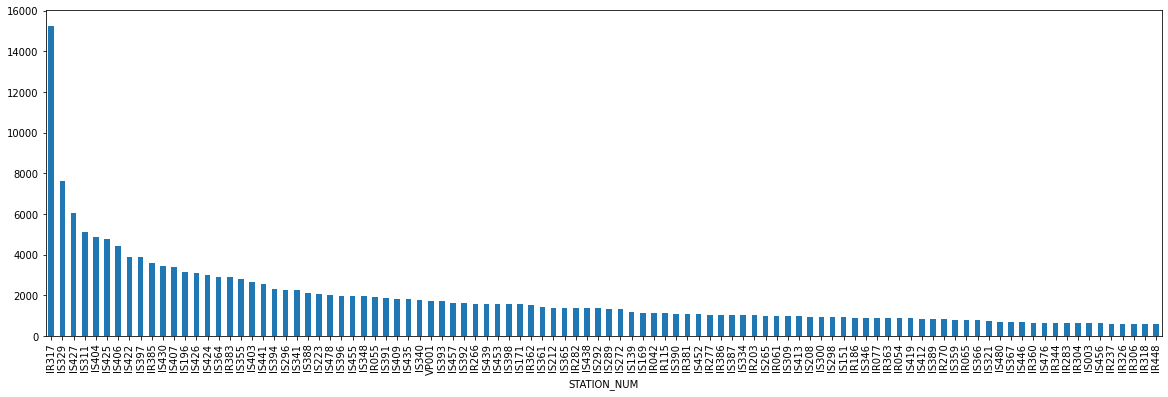

In [29]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('STATION_NUM').size().sort_values(ascending=False).head(100).plot.bar()

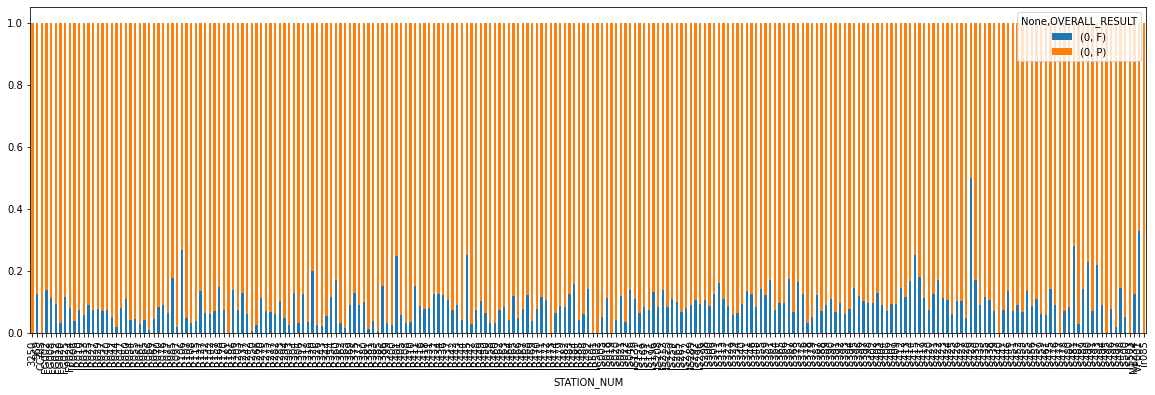

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(df.groupby(['STATION_NUM', 'OVERALL_RESULT']).size()/df.groupby('STATION_NUM').size()).unstack().plot.bar(ax=ax, stacked=True)

### calculate percentage of fails and passes per station to find out whether there are stations which are biased. 
--> I don't think that this will be important for any model but might help the client or might help us to understand the data better and/or remove data from biased stations?

*percentage calculation by Isabelle Nguyen*

In [32]:
top_indices = df.groupby(['STATION_NUM']).size().sort_values(ascending=False).head(20).index#.head(240).unstack()

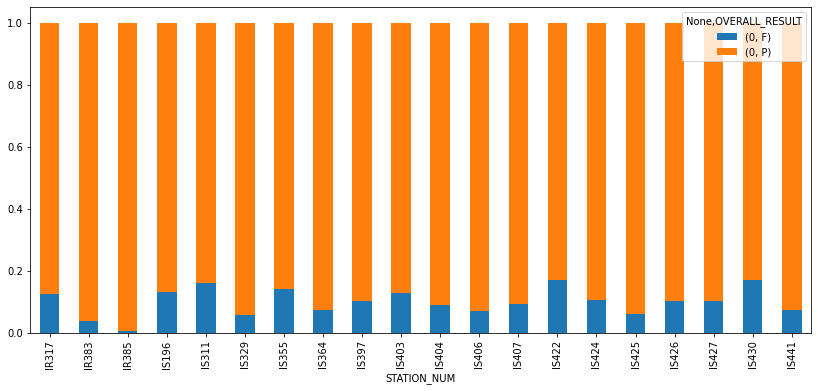

In [33]:
fig, ax = plt.subplots(figsize=(14,6))
top_stations = df[df.STATION_NUM.isin(top_indices)]
pd.DataFrame(top_stations.groupby(['STATION_NUM','OVERALL_RESULT']).size()/top_stations.groupby('STATION_NUM').size()).unstack().fillna(0).plot.bar(ax=ax, stacked=True)
plt.show()

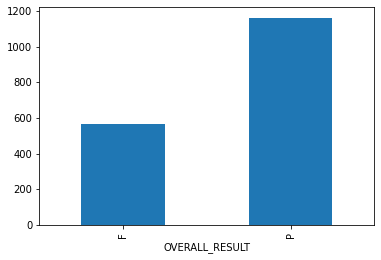

In [35]:
df[df.STATION_NUM == 'VP001'].groupby('OVERALL_RESULT').size().plot.bar()

In [34]:
#df['OVERALL_RESULT'].value_counts(normalize=True) * 100
tab = pd.crosstab(df['OVERALL_RESULT'],df['STATION_NUM']).apply(lambda r: r/r.sum(), axis=1)
tab

STATION_NUM,3250,969,CCAIS,FG002,FG008,FG012,FG020,FG025,FP024,IR006,IR010,IR013,IR025,IR027,IR029,IR037,IR040,IR042,IR044,IR047,IR050,IR054,IR055,IR061,IR065,IR066,IR067,IR070,IR076,IR077,IR085,IR097,IR106,IR107,IR108,IR115,IR127,IR132,IR142,IR157,IR168,IR170,IR181,IR186,IR203,IR237,IR242,IR250,IR266,IR270,IR275,IR277,IR282,IR283,IR294,IR303,IR304,IR306,IR317,IR318,IR320,IR326,IR343,IR344,IR354,IR360,IR362,IR363,IR369,IR375,IR377,IR380,IR381,IR383,IR385,IR386,IR399,IR400,IR401,IR405,IR408,IR410,IR411,IR416,IR418,IR431,IR432,IR434,IR436,IR437,IR442,IR443,IR444,IR445,IR447,IR448,IR449,IR450,IR458,IR460,...,IS267,IS272,IS289,IS292,IS296,IS298,IS300,IS309,IS311,IS313,IS321,IS329,IS334,IS340,IS341,IS346,IS348,IS355,IS359,IS361,IS364,IS365,IS366,IS367,IS368,IS373,IS376,IS378,IS379,IS387,IS388,IS389,IS390,IS391,IS392,IS393,IS394,IS395,IS396,IS397,IS398,IS402,IS403,IS404,IS406,IS407,IS409,IS412,IS413,IS414,IS415,IS417,IS419,IS420,IS421,IS422,IS423,IS424,IS425,IS426,IS427,IS428,IS429,IS430,IS433,IS435,IS438,IS439,IS440,IS441,IS446,IS451,IS452,IS453,IS455,IS456,IS457,IS459,IS461,IS475,IS476,IS477,IS478,IS480,IS481,IS487,IS489,IS490,IS491,IS493,IS494,IS495,IS496,IS497,IS498,IS500,IS503,N1234,VP001,ir085
OVERALL_RESULT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0.000000,0.000098,0.000000,0.001376,0.001425,0.000737,0.000049,0.000344,0.000590,0.000344,0.000246,0.000344,0.000835,0.000737,0.000442,0.001621,0.000983,0.002948,0.000442,0.000639,0.001130,0.001769,0.004226,0.001474,0.001621,0.000049,0.000442,0.001769,0.000344,0.002801,0.000393,0.000295,0.005208,0.001278,0.000491,0.002113,0.001572,0.000835,0.001179,0.001523,0.001867,0.001425,0.000000,0.006191,0.003783,0.003833,0.000246,0.000049,0.002064,0.004570,0.001376,0.003489,0.004078,0.003243,0.000688,0.000639,0.004029,0.000934,0.093947,0.001032,0.000098,0.000737,0.00059,0.001769,0.001376,0.005552,0.002555,0.000737,0.000049,0.002899,0.000442,0.000737,0.000786,0.005405,0.001474,0.007862,0.000491,0.000246,0.003046,0.000639,0.000688,0.000295,0.000393,0.000442,0.000491,0.001179,0.000049,0.000393,0.000737,0.001425,0.000934,0.000246,0.000295,0.000049,0.000442,0.002162,0.000786,0.000983,0.000491,0.000688,...,0.000884,0.005208,0.005896,0.007174,0.010318,0.005012,0.004127,0.006093,0.040487,0.002211,0.003243,0.021669,0.003194,0.008156,0.015183,0.005651,0.008107,0.019703,0.004914,0.012038,0.010711,0.006633,0.003636,0.005847,0.001867,0.002555,0.000147,0.000246,0.001228,0.006240,0.007469,0.003685,0.005994,0.006289,0.007665,0.005110,0.008697,0.00113,0.011645,0.019998,0.007370,0.00226,0.016804,0.021619,0.015822,0.015871,0.008304,0.006044,0.005651,0.002801,0.004078,0.000786,0.004815,0.001818,0.002948,0.033019,0.000884,0.015674,0.014298,0.015920,0.031152,0.000049,0.000049,0.029088,0.001474,0.010220,0.007125,0.005503,0.000000,0.009336,0.004471,0.000590,0.004864,0.005356,0.013217,0.002702,0.008746,0.001032,0.000049,0.001278,0.002948,0.000000,0.006977,0.002899,0.000983,0.000098,0.000147,0.001376,0.000688,0.000835,0.000737,0.000000,0.000147,0.000049,0.000295,0.000049,0.000000,0.000098,0.027860,0.000000
P,0.000021,0.000074,0.000074,0.000914,0.001198,0.000757,0.000152,0.000284,0.000704,0.000867,0.000321,0.000609,0.000898,0.000977,0.000557,0.002270,0.001277,0.005748,0.002186,0.000772,0.000993,0.004435,0.009594,0.005175,0.004072,0.000483,0.000998,0.002096,0.000368,0.004387,0.000194,0.001550,0.001513,0.002680,0.001582,0.005801,0.001072,0.001282,0.001918,0.002170,0.001151,0.001865,0.000026,0.004135,0.004965,0.002737,0.000399,0.000652,0.008202,0.003836,0.001907,0.005128,0.006762,0.003037,0.001461,0.002475,0.002869,0.003016,0.070228,0.002990,0.000042,0.003047,0.00268,0.003231,0.001130,0.002895,0.007902,0.004603,0.000053,0.002065,0.000473,0.000720,0.005680,0.014644,0.018705,0.004660,0.001539,0.000919,0.000993,0.001124,0.002075,0.000872,0.000236,0.000499,0.000615,0.

In [ ]:
df = df[df.OVERALL_RESULT.isin(['P', 'F'])]


In [ ]:
#df.groupby(['STATION_NUM', 'OVERALL_RESULT']).size().reset_index(name='counts')
counts = df.groupby(['STATION_NUM', 'OVERALL_RESULT']).size().reset_index(name='counts')

In [ ]:
counts

cyl, trans type, dual exhaust

#CYLINDER
has a strange value "R" - but it is not frequent (N=90) and can eventually be removed (?)
tranforming to float makes the variable more consistent

In [ ]:
df.CYL.describe()




In [ ]:
df.CYL.value_counts()

In [ ]:
df = df[df.CYL != 'R']

In [ ]:
df["CYL"] = df.CYL.astype(float)
df.CYL.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('CYL').size().sort_values(ascending=False).head(100).plot.bar()

#trans type = transmission type
binary condition with categories "A" & "M"
which apparently refer to "automatic" or "manual" transmission
Percentages: 
* A    83% automatic
* M    16% manual

--> I don't think it will be a useful feature


In [ ]:
df.TRANS_TYPE.describe()

In [ ]:
df.TRANS_TYPE.value_counts()

In [ ]:
df['TRANS_TYPE'].value_counts(normalize=True) * 100

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('TRANS_TYPE').size().sort_values(ascending=False).head(100).plot.bar()

#dual exhaust
might make a car more efficient (https://resource-center.meineke.com/dual-exhausts-just-for-looks/)

I'd suggest not to use dual_exhaust further.
The variable is binary (Yes/No) and has only a very few occurrences of Yes (0.6%). It encodes if the car has two exhaust pipes, which makes bigger cars more efficient.

Percentage of Dual Exhaust Cars: 

* NO   99.4%
* YES   0.6%




In [ ]:
df.DUAL_EXHAUST.describe()

In [ ]:
df.DUAL_EXHAUST.value_counts()

In [ ]:
df['DUAL_EXHAUST'].value_counts(normalize=True) * 100

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('DUAL_EXHAUST').size().sort_values(ascending=False).head(100).plot.bar()

# SOFTWARE VERSION
the numbers are strange - the version numbers all have three digits, but there is only one frequently used software version 5xx, but mostly 1xx and 2xx

In [ ]:
df.SOFTWARE_VERSION.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('SOFTWARE_VERSION').size().sort_values(ascending=False).plot.bar()

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_models.groupby(['SOFTWARE_VERSION', 'OVERALL_RESULT']).size()).unstack().plot.bar(ax=ax)

In [ ]:
df.groupby('SOFTWARE_VERSION')['OVERALL_RESULT'].count()